# 

In [52]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('tax-receipts.csv')


In [54]:
df.head()

,id,year,major_head,estimate_type,major_category,minor_category,sub_category,amount
0,0,2017-2018,20,Actual,Corporation Tax,Collections,NaN,486113.18
1,1,2017-2018,20,Actual,Corporation Tax,Surcharge,NaN,21439.48
2,2,2017-2018,20,Actual,Corporation Tax,Education Cess / Health and Education Cess,NaN,16305.02
3,3,2017-2018,20,Actual,Corporation Tax,Penalties,NaN,1526.86
4,4,2017-2018,20,Actual,Corporation Tax,Interest Recoveries,NaN,3209.30


In [55]:
df.shape

(2069, 8)

In [56]:
df.dtypes

id                  int64
year               object
major_head          int64
estimate_type      object
major_category     object
minor_category     object
sub_category       object
amount            float64
dtype: object

In [57]:
df.info

<bound method DataFrame.info of         id       year  major_head estimate_type  \
0        0  2017-2018          20        Actual   
1        1  2017-2018          20        Actual   
2        2  2017-2018          20        Actual   
3        3  2017-2018          20        Actual   
4        4  2017-2018          20        Actual   
...    ...        ...         ...           ...   
2064  2064  2024-2025         710        Budget   
2065  2065  2024-2025           7        Budget   
2066  2066  2024-2025          37        Budget   
2067  2067  2024-2025          38        Budget   
2068  2068  2024-2025          30        Budget   

                                         major_category  \
0                                       Corporation Tax   
1                                       Corporation Tax   
2                                       Corporation Tax   
3                                       Corporation Tax   
4                                       Corporation Tax   
.

In [58]:
df.describe()

,id,major_head,amount
count,2069.000000,2069.000000,1.463000e+03
mean,1034.000000,87.939584,3.574202e+04
std,597.413174,185.179425,1.214642e+05
min,0.000000,5.000000,-8.500000e+03
25%,517.000000,28.000000,0.000000e+00
50%,1034.000000,38.000000,2.600000e+01
75%,1551.000000,38.000000,5.844270e+03
max,2068.000000,710.000000,1.004000e+06


In [59]:
df.columns

Index(['id', 'year', 'major_head', 'estimate_type', 'major_category',
       'minor_category', 'sub_category', 'amount'],
      dtype='object')

In [60]:
df.isnull().sum()

id                  0
year                0
major_head          0
estimate_type       0
major_category      0
minor_category      0
sub_category      427
amount            606
dtype: int64

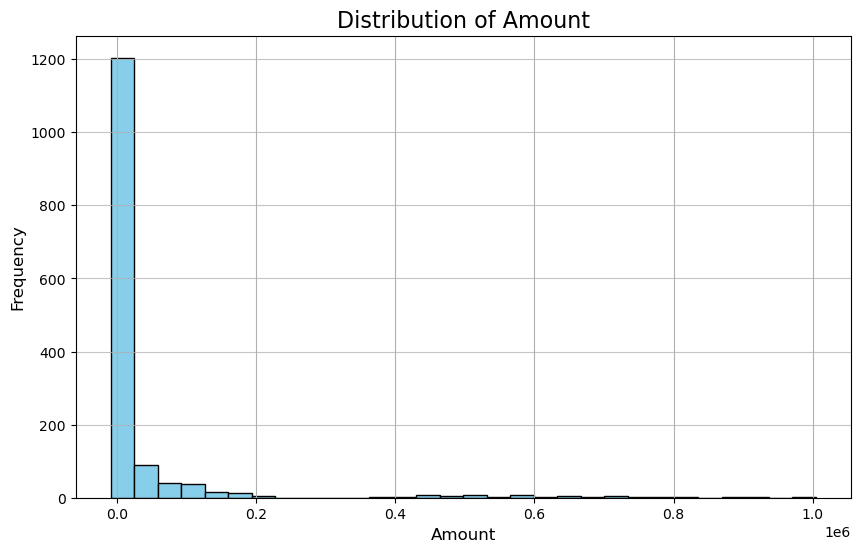

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['amount'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Amount', fontsize=16)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()


Unique major_head values: 21
major_head
38     683
37     380
710    168
20     168
21     146
44     129
28      79
45      45
36      23
31      23
32      23
8       23
40      23
23      22
24      22
26      22
5       21
9       21
7       21
34      19
30       8
Name: count, dtype: int64


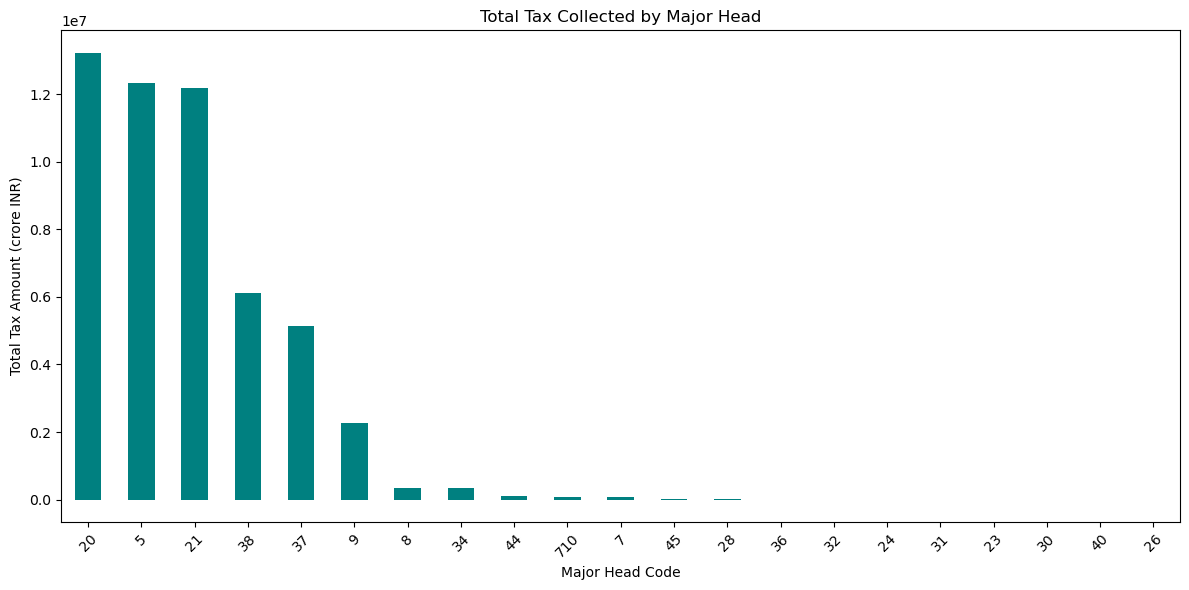

In [62]:
# Check unique major_head values and their frequencies
print("Unique major_head values:", df['major_head'].nunique())
print(df['major_head'].value_counts())

# Plot total amount by major_head
plt.figure(figsize=(12, 6))
df.groupby('major_head')['amount'].sum().sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Total Tax Collected by Major Head')
plt.xlabel('Major Head Code')
plt.ylabel('Total Tax Amount (crore INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


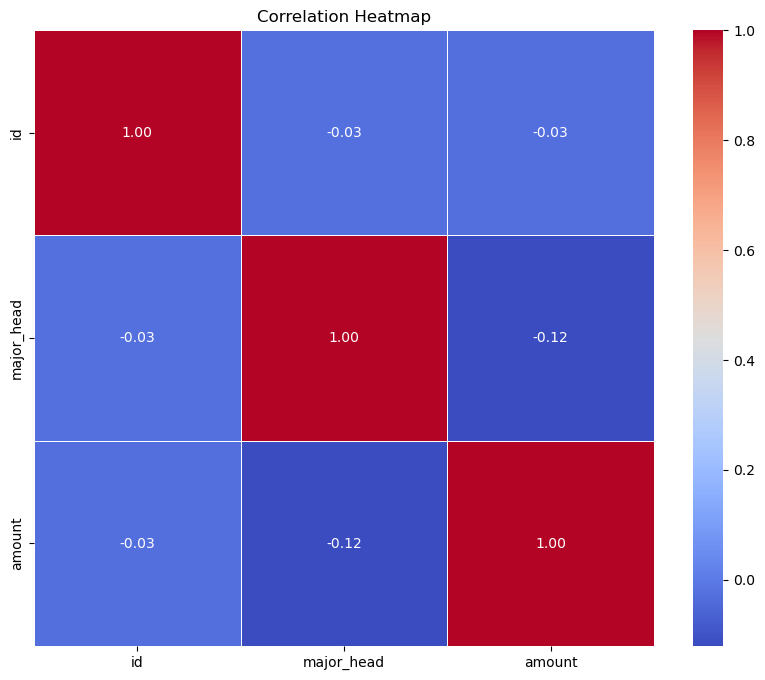

In [63]:

# Optional: Set a style
corr = df.corr(numeric_only=True)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [64]:
print(corr)

                  id  major_head    amount
id          1.000000   -0.027163 -0.030647
major_head -0.027163    1.000000 -0.120919
amount     -0.030647   -0.120919  1.000000


In [65]:
from scipy.stats import normaltest
# Drop NaNs temporarily
amount_nonnull = df['amount'].dropna()

# Perform normality test
stat, p = normaltest(amount_nonnull)
print("Normality Test p-value:", p)

# as p value < 0.05 median will be used , amount do not forms bell curve


Normality Test p-value: 9.347645089433893e-305


In [66]:
# as p value < 0.05 median will be used , amount do not forms bell curve
fill_value = amount_nonnull.median()
print('fill value is',fill_value)
df['amount'] = df['amount'].fillna(fill_value)

fill value is 26.0


In [67]:
plt.figure(figsize=(6, 6))
stats.probplot(df['amount'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Tax Amount")
plt.tight_layout()
plt.show()

NameError: name 'stats' is not defined

<Figure size 600x600 with 0 Axes>

In [89]:
df['amount'].isnull().sum()

0

In [91]:
# If 'minor_category' is in the index, remove it from index first
if 'minor_category' in df.index.names:
    df = df.reset_index()  # This will move index levels back to columns

# Define function to fill NaNs with mode
def fill_with_mode(series):
    mode_val = series.mode()
    return series.fillna(mode_val[0]) if not mode_val.empty else series

# Group by 'minor_category' and fill 'sub_category' using the most frequent value (mode)
df['sub_category'] = df.groupby('minor_category')['sub_category'].transform(fill_with_mode)


In [93]:
# sum rows of sub_category is filled using mode of minor_category group wise
df['sub_category'].isnull().sum()

324

In [95]:
# 1. Make a working copy
df_cleaned = df.copy()

# 2. Ensure index is clean (remove any multi-index)
df_cleaned = df_cleaned.reset_index(drop=True)

# 3. Define a safe function to fill mode, ignoring groups where everything is NaN
def fill_with_mode_safe(group):
    if group['sub_category'].notna().any():
        mode_val = group['sub_category'].mode()
        if not mode_val.empty:
            group['sub_category'] = group['sub_category'].fillna(mode_val[0])
    return group

# 4. Apply group-wise mode fill
df_cleaned = df_cleaned.groupby('minor_category', group_keys=False).apply(fill_with_mode_safe)

# 5. Fill any remaining NaNs with a fallback value
df_cleaned['sub_category'] = df_cleaned['sub_category'].fillna('Unknown')

# 6. Confirm it worked
print("Nulls remaining in sub_category:", df_cleaned['sub_category'].isna().sum())


Nulls remaining in sub_category: 0


In [97]:
df['sub_category']=df_cleaned['sub_category'].copy()
df_cleaned

,id,year,major_head,estimate_type,major_category,minor_category,sub_category,amount
0,0,2017-2018,20,Actual,Corporation Tax,Collections,Cess Collection on Textiles & Textile Machinery,486113.18
1,1,2017-2018,20,Actual,Corporation Tax,Surcharge,Unknown,21439.48
2,2,2017-2018,20,Actual,Corporation Tax,Education Cess / Health and Education Cess,Unknown,16305.02
3,3,2017-2018,20,Actual,Corporation Tax,Penalties,Unknown,1526.86
4,4,2017-2018,20,Actual,Corporation Tax,Interest Recoveries,Unknown,3209.30
...,...,...,...,...,...,...,...,...
2064,2064,2024-2025,710,Budget,Taxes of Union Territories,Other Taxes and Duties,Salt,4.10
2065,2065,2024-2025,7,Budget,Taxes of Union Territories,Union Territories Goods and Services Tax (UTGST),Salt,4900.00
2066,2066,2024-2025,37,Budget,Less-NCCD transferred to the National Disaster...,NCCD (Customs),Salt,-940.00
2067,2067,2024-2025,38,Budget,Less-NCCD transferred to the National Disaster...,NCCD (Union Excise),Salt,-8500.00


In [99]:
df['sub_category'].isnull().sum()

0

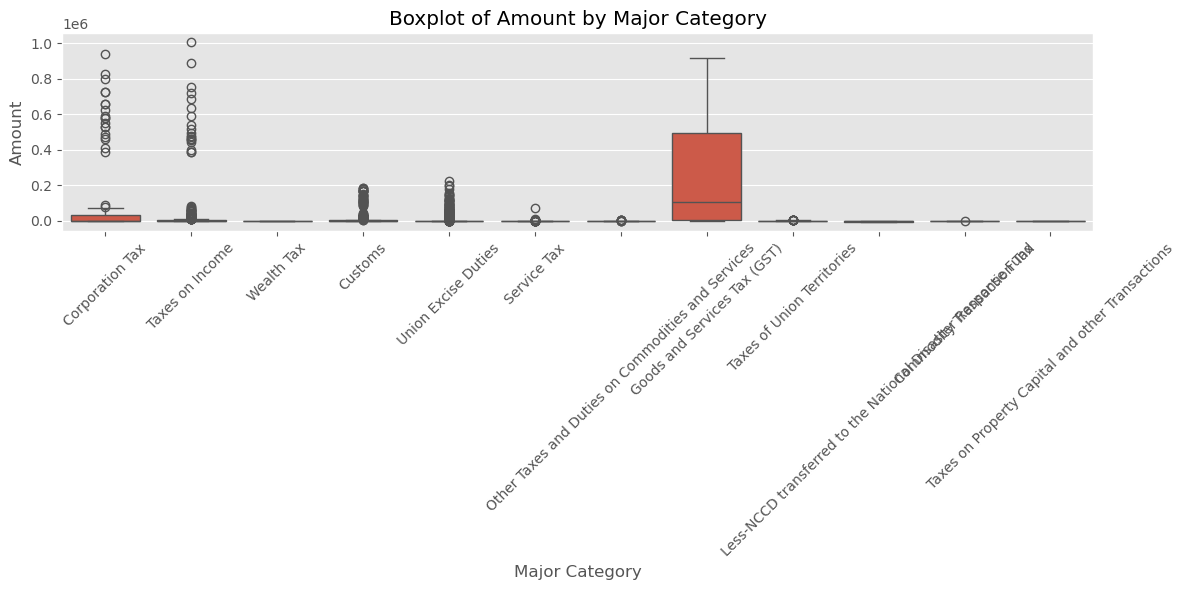

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
plt.style.use('ggplot')

# Apply log transformation
df['log_amount'] = np.log(df['amount'])  # or use np.log1p(df['amount']) if values <= 0 are possible

# Create boxplots for log(amount) vs major categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='major_category', y='amount', data=df)
plt.title('Boxplot of Amount by Major Category')
plt.xlabel('Major Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



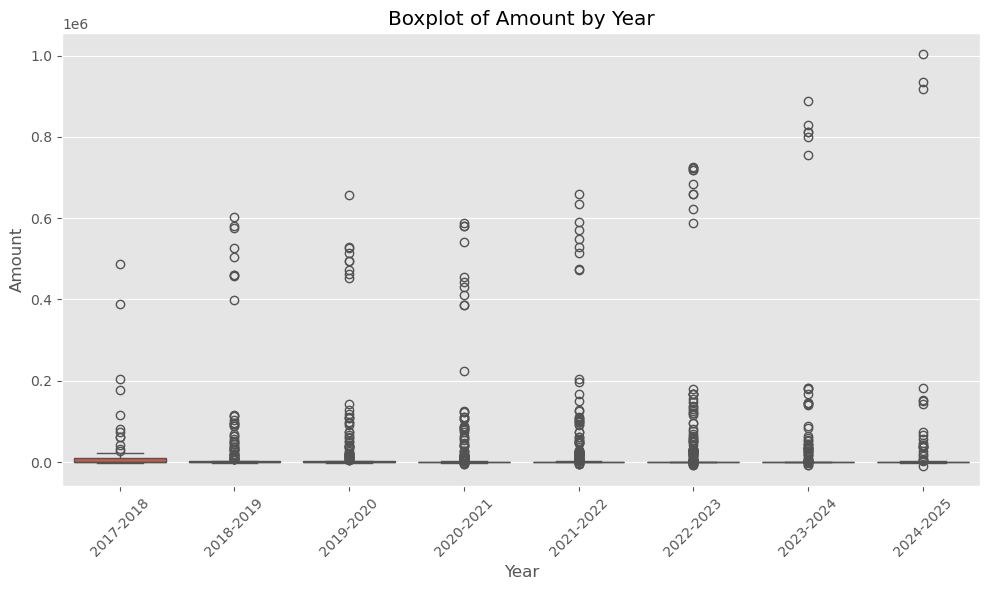

In [102]:
df['log_amount'] = np.log(df['amount'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='amount', data=df)
plt.title('Boxplot of Amount by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


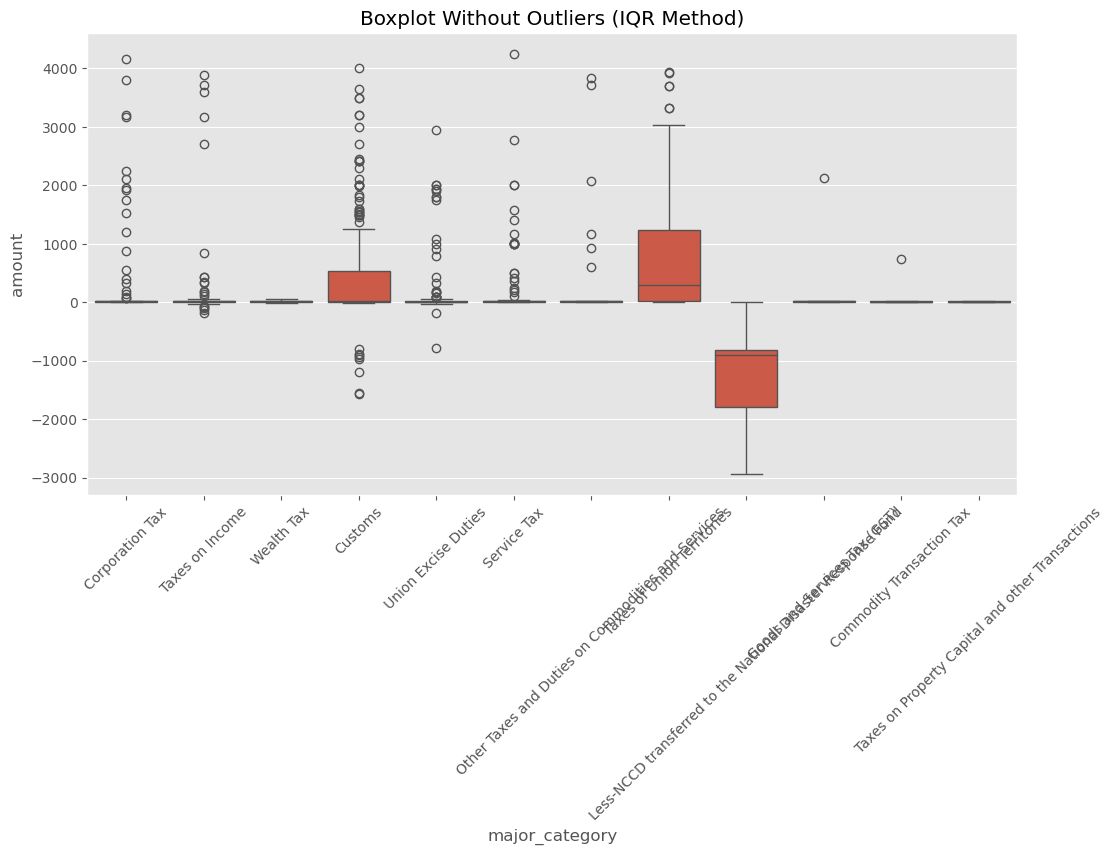

In [104]:
def remove_outliers_iqr(df, column):
    """Remove outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Filter the DataFrame
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to your DataFrame
df = remove_outliers_iqr(df, 'amount')

# Now plot with cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(x='major_category', y='amount', data=df)
plt.title('Boxplot Without Outliers (IQR Method)')
plt.xticks(rotation=45)
plt.show()


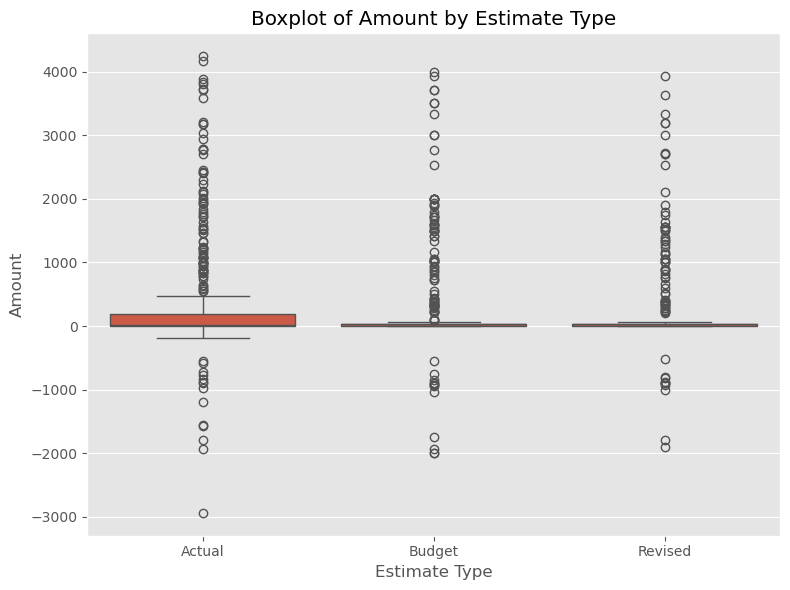

In [106]:
df['log_amount'] = np.log(df['amount'])  # or np.log1p(df['amount']) if there are zero or negative values

# Create boxplot using the log-transformed amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='estimate_type', y='amount', data=df)
plt.title('Boxplot of Amount by Estimate Type')
plt.xlabel('Estimate Type')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

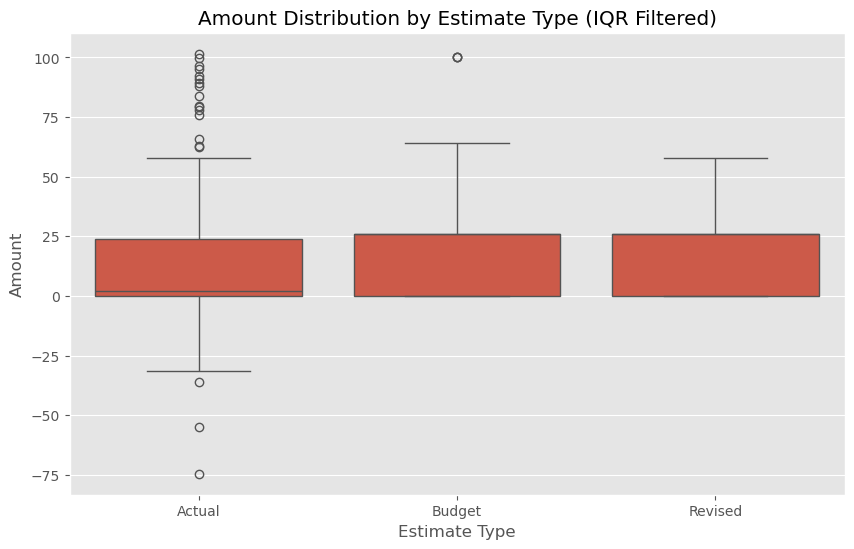

In [107]:
# IQR Outlier Removal Function
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3*IQR
    upper = Q3 + 3*IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply IQR filter
df_cleaned = remove_outliers_iqr(df.dropna(subset=['amount']), 'amount')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='estimate_type', y='amount', data=df_cleaned)
plt.title('Amount Distribution by Estimate Type (IQR Filtered)')
plt.xlabel('Estimate Type')
plt.ylabel('Amount')
plt.show()

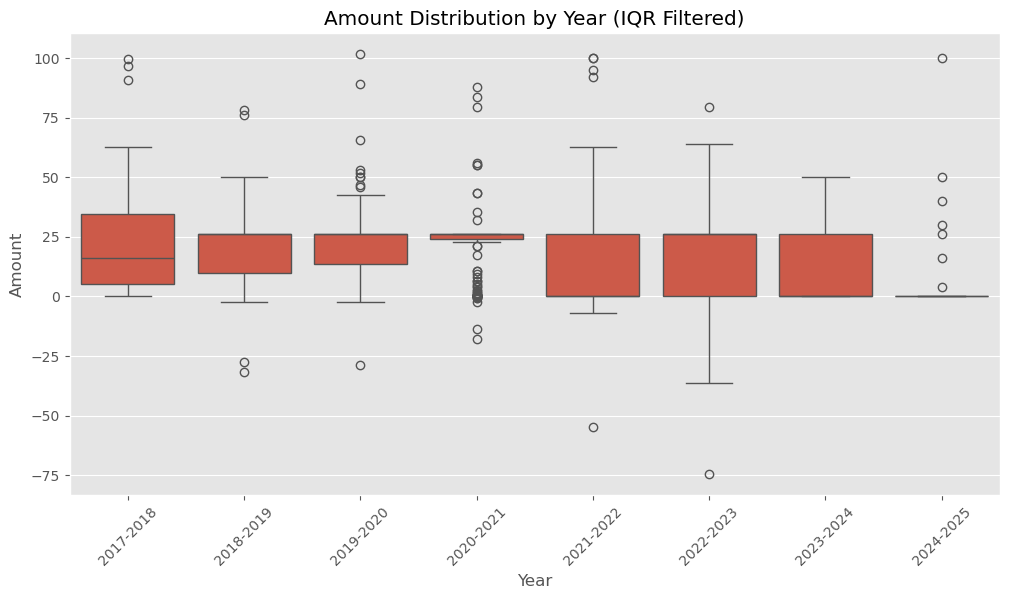

In [109]:
# Using same cleaned data from above (df_clean)

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='amount', data=df_cleaned)
plt.title('Amount Distribution by Year (IQR Filtered)')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

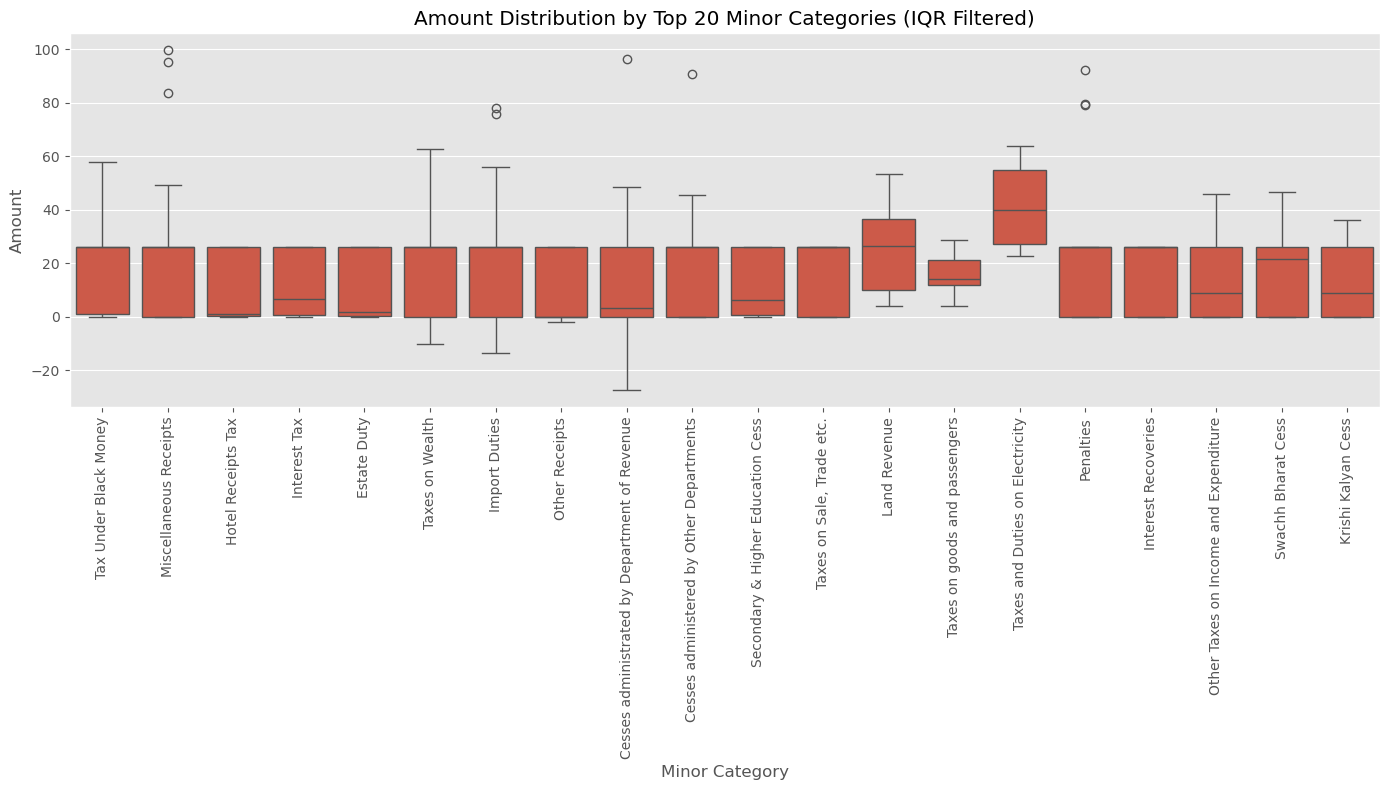

In [111]:
# Get top 20 minor categories by frequency
top_minors = df_cleaned['minor_category'].value_counts().nlargest(20).index
df = df_cleaned[df_cleaned['minor_category'].isin(top_minors)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='minor_category', y='amount', data=df)
plt.title('Amount Distribution by Top 20 Minor Categories (IQR Filtered)')
plt.xlabel('Minor Category')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [113]:
# Split the year column into start_year and end_year
df[['start_year', 'end_year']] = df['year'].str.split('-', expand=True)

# Convert to integers (optional)
df['start_year'] = df['start_year'].astype(int)
df['end_year'] = df['end_year'].astype(int)
# Add a duration column (end_year - start_year)
df['duration_years'] = df['end_year'] - df['start_year'] + 1  # +1 to include both years
# Verify the result
print(df[['year', 'start_year', 'end_year','duration_years']].head())

         year  start_year  end_year  duration_years
13  2017-2018        2017      2018               2
14  2017-2018        2017      2018               2
17  2017-2018        2017      2018               2
18  2017-2018        2017      2018               2
21  2017-2018        2017      2018               2


In [115]:
df.head()

,id,year,major_head,estimate_type,major_category,minor_category,sub_category,amount,log_amount,start_year,end_year,duration_years
13,13,2017-2018,21,Actual,Taxes on Income,Tax Under Black Money,Unknown,9.94,2.296567,2017,2018,2
14,14,2017-2018,21,Actual,Taxes on Income,Miscellaneous Receipts,Paper,99.63,4.601463,2017,2018,2
17,17,2017-2018,23,Actual,Taxes on Income,Hotel Receipts Tax,Unknown,0.50,-0.693147,2017,2018,2
18,18,2017-2018,24,Actual,Taxes on Income,Interest Tax,Unknown,4.45,1.492904,2017,2018,2
21,21,2017-2018,31,Actual,Wealth Tax,Estate Duty,Other Receipts,0.84,-0.174353,2017,2018,2


In [117]:
df.shape

(900, 12)

In [121]:
print("=== Data Types ===")
print(df.dtypes)

# 2. Check for Remaining Missing Values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# 3. Verify Outlier Handling
print("\n=== Outlier Summary ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < (q1 - 1.5*iqr)) | (df[col] > (q3 + 1.5*iqr))]
    print(f"{col}: {len(outliers)} outliers remaining")

# 4. Validate Year Splitting
if 'year' in df.columns:
    print("\n=== Year Validation ===")
    print("Sample year values:")
    print(df[['year', 'start_year', 'end_year']].head(3))
    assert (df['end_year'] > df['start_year']).all(), "End year should be > start year"

# 5. Check Categorical Values
print("\n=== Categorical Values ===")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col} unique values:")
    print(df[col].value_counts().head())

# 6. Final Data Summary
print("\n=== Final Data Shape ===")
print(f"Rows: {len(df)}, Columns: {len(df.columns)}")
print("\nSample Data:")
print(df.head(3))

=== Data Types ===
id                  int64
year               object
major_head          int64
estimate_type      object
major_category     object
minor_category     object
sub_category       object
amount            float64
log_amount        float64
start_year          int32
end_year            int32
duration_years      int32
dtype: object

=== Missing Values ===
id                0
year              0
major_head        0
estimate_type     0
major_category    0
minor_category    0
sub_category      0
amount            0
log_amount        9
start_year        0
end_year          0
duration_years    0
dtype: int64

=== Outlier Summary ===
id: 0 outliers remaining
major_head: 62 outliers remaining
amount: 10 outliers remaining
log_amount: 0 outliers remaining
start_year: 0 outliers remaining
end_year: 0 outliers remaining
duration_years: 0 outliers remaining

=== Year Validation ===
Sample year values:
         year  start_year  end_year
13  2017-2018        2017      2018
14  2017-2018

In [123]:
print(f"\nDuplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)  # If needed


Duplicate rows: 0


In [125]:

df.to_csv('cleaned data.csv', index=False)
print("\nCleaned data exported successfully!")


Cleaned data exported successfully!


In [127]:
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [128]:
# Import cleaned data as new_df
new_df = pd.read_csv('cleaned_tax_receipts.csv')

# ======================
# 4. EXPLORATORY DATA ANALYSIS
# ======================

# 4.1 Descriptive StatisticsS
print("=== Descriptive Statistics ===")
print(new_df.describe(include='all'))



=== Descriptive Statistics ===
                 id       year  major_head estimate_type       major_category  \
count    900.000000        900  900.000000           900                  900   
unique          NaN          8         NaN             3                    8   
top             NaN  2022-2023         NaN        Budget  Union Excise Duties   
freq            NaN        169         NaN           437                  353   
mean    1025.918889        NaN   80.580000           NaN                  NaN   
std      594.165173        NaN  171.456267           NaN                  NaN   
min       13.000000        NaN   20.000000           NaN                  NaN   
25%      493.750000        NaN   28.000000           NaN                  NaN   
50%     1018.500000        NaN   38.000000           NaN                  NaN   
75%     1536.250000        NaN   38.000000           NaN                  NaN   
max     2063.000000        NaN  710.000000           NaN                  NaN 

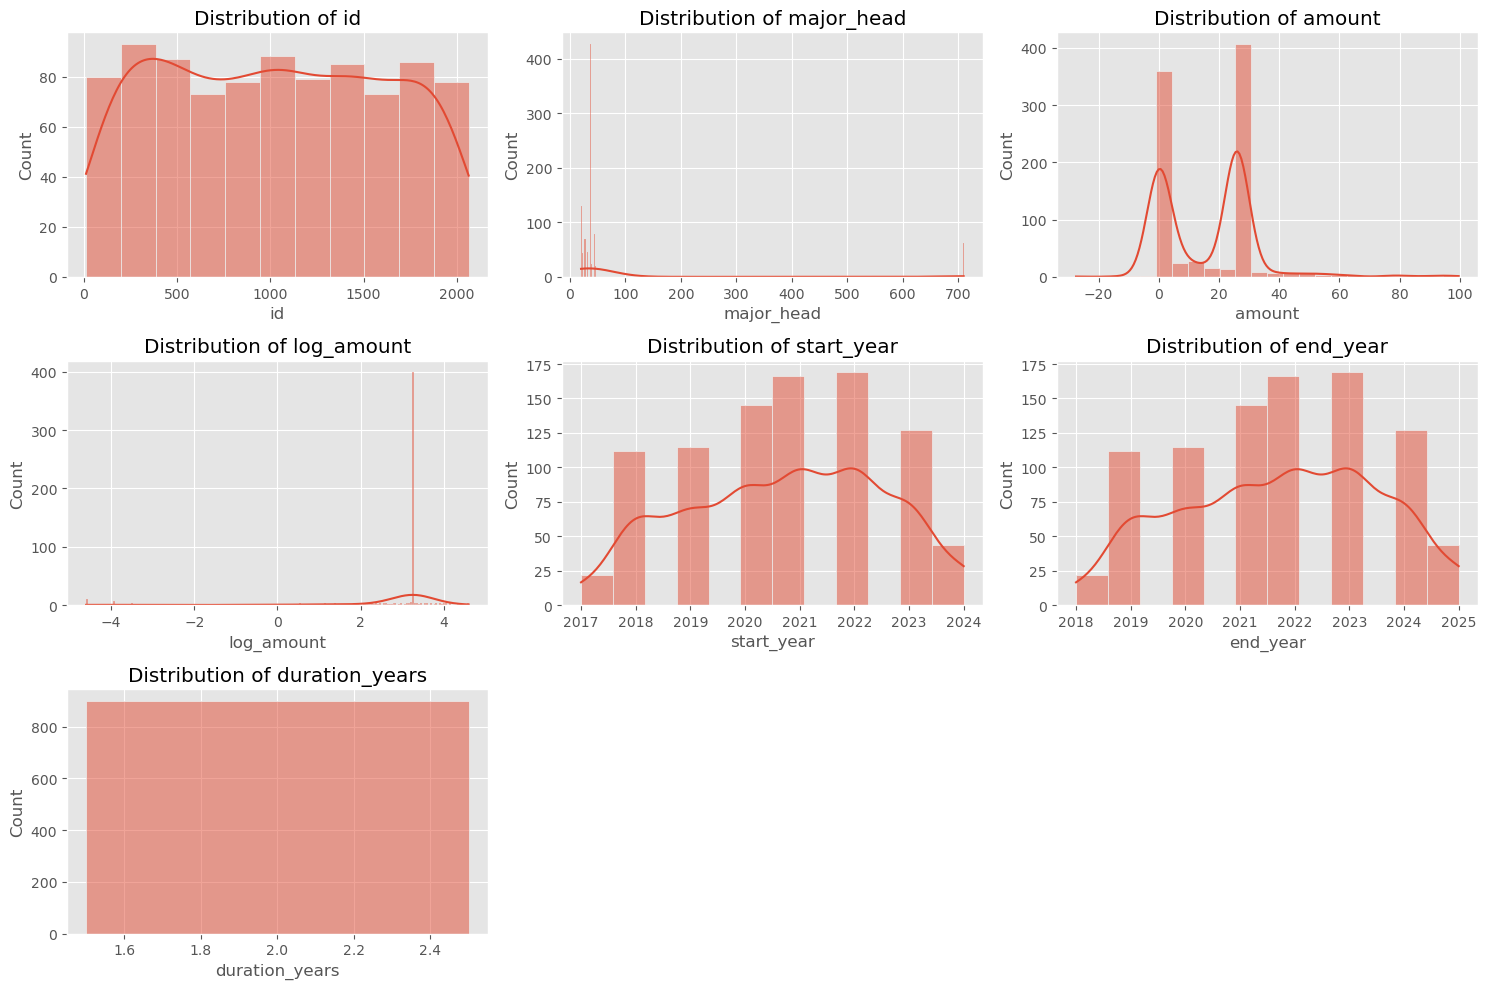

In [131]:
def plot_distributions(df):
    # Numeric distributions
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(15,10))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    
    # Categorical distributions
 

plot_distributions(new_df)

Index(['year', 'estimate_type', 'major_category', 'minor_category',
       'sub_category'],
      dtype='object')


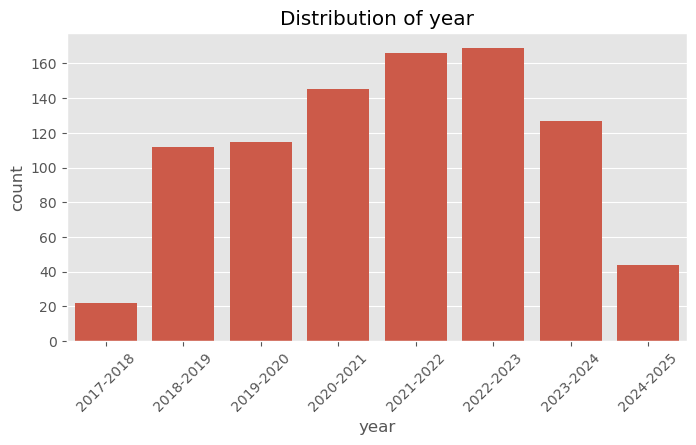

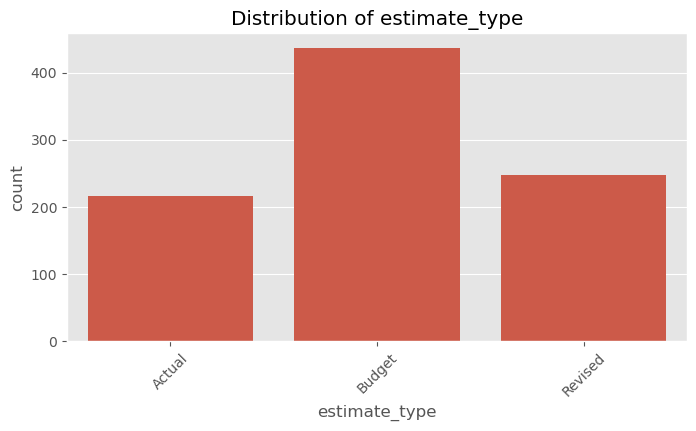

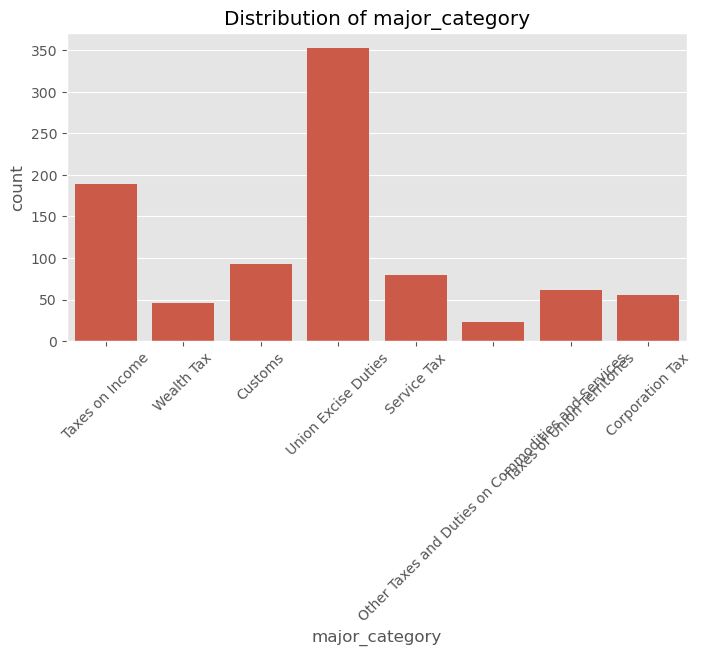

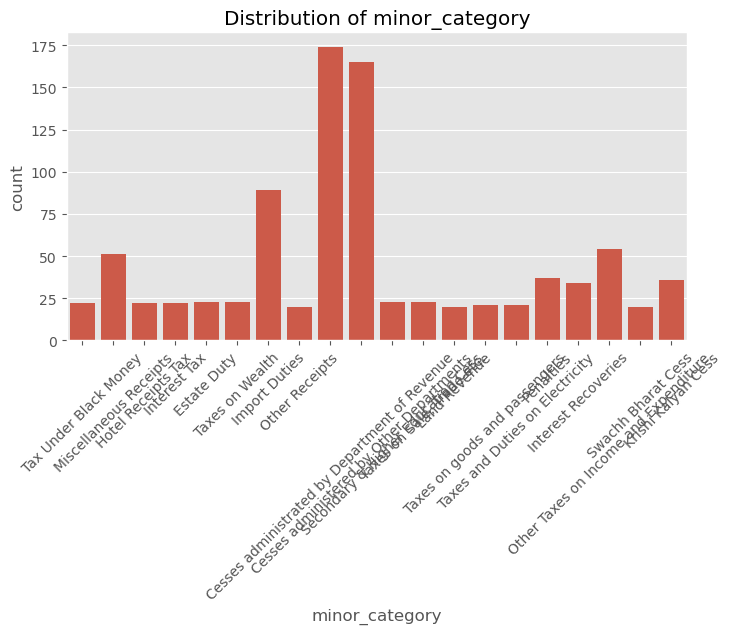

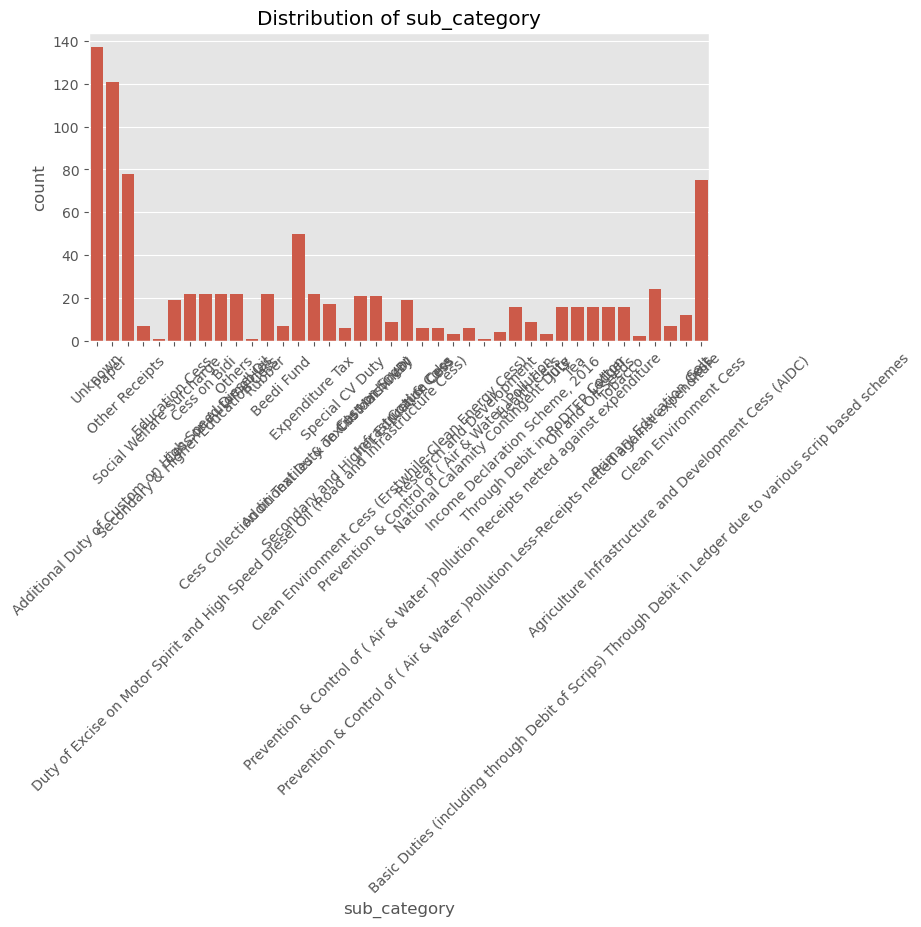

In [132]:
def plot_distributions(df):
    # Categorical distributions
    categorical_cols = df.select_dtypes(include=['object']).columns
    print(categorical_cols)
    for col in categorical_cols:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col)
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {col}')
        plt.show()

plot_distributions(new_df)

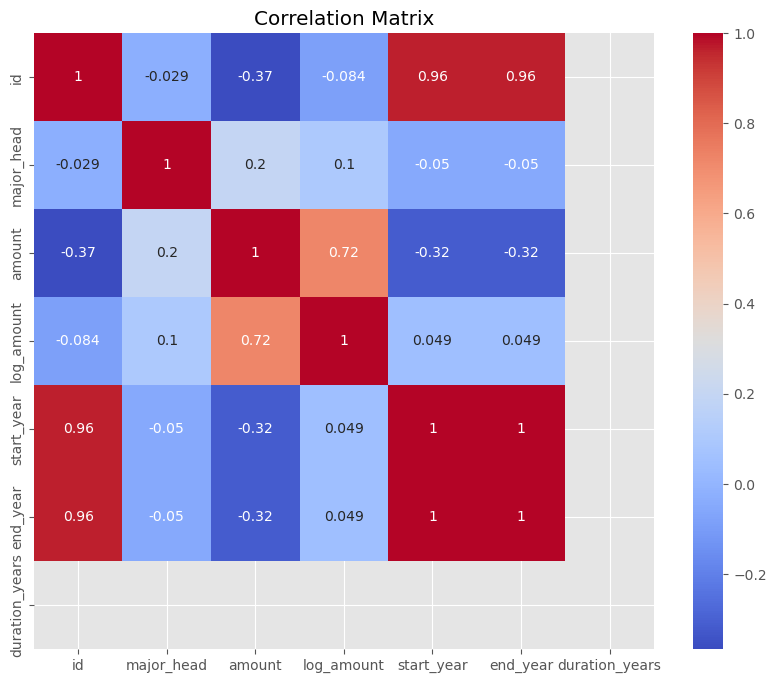

In [133]:
# 4.3 Correlation Analysis
plt.figure(figsize=(10,8))
sns.heatmap(new_df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [134]:
# 4.4 Statistical Properties
print("\n=== Normality Tests ===")
for col in new_df.select_dtypes(include=[np.number]).columns:
    stat, p = stats.shapiro(new_df[col].dropna())
    print(f"{col}: Shapiro-Wilk p-value = {p:.4f}")


=== Normality Tests ===
id: Shapiro-Wilk p-value = 0.0000
major_head: Shapiro-Wilk p-value = 0.0000
amount: Shapiro-Wilk p-value = 0.0000
log_amount: Shapiro-Wilk p-value = 1.0000
start_year: Shapiro-Wilk p-value = 0.0000
end_year: Shapiro-Wilk p-value = 0.0000
duration_years: Shapiro-Wilk p-value = 1.0000


In [135]:
# ======================
# 5. STATISTICAL ANALYSIS
# ======================
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 5.1 Hypothesis Testing Example (t-test)
print("\n=== T-Test Example ===")
group1 = df[df['estimate_type'] == 'Actual']['amount']
group2 = df[df['estimate_type'] == 'Budget']['amount']
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")




=== T-Test Example ===
t-statistic: -2.14, p-value: 0.0333


In [136]:
# 5.2 Regression Analysis
print("\n=== Regression Analysis ===")
model = ols('amount ~ C(estimate_type) + start_year', data=df).fit()
print(model.summary())



=== Regression Analysis ===
                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     50.27
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           4.96e-30
Time:                        19:37:42   Log-Likelihood:                -3692.3
No. Observations:                 900   AIC:                             7393.
Df Residuals:                     896   BIC:                             7412.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [137]:

# 5.3 ANOVA Example
print("\n=== ANOVA ===")
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)


=== ANOVA ===
                         sum_sq     df           F        PR(>F)
C(estimate_type)    9768.640923    2.0   22.692695  2.433150e-10
start_year         30754.150624    1.0  142.884680  1.162233e-30
Residual          192852.858842  896.0         NaN           NaN



=== Clustering Analysis ===


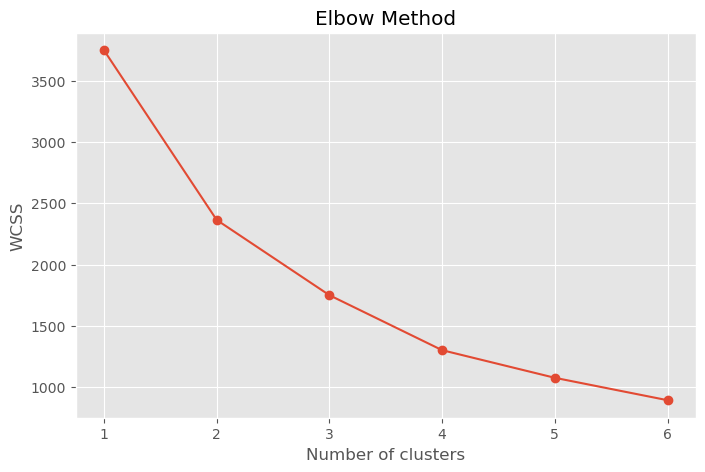

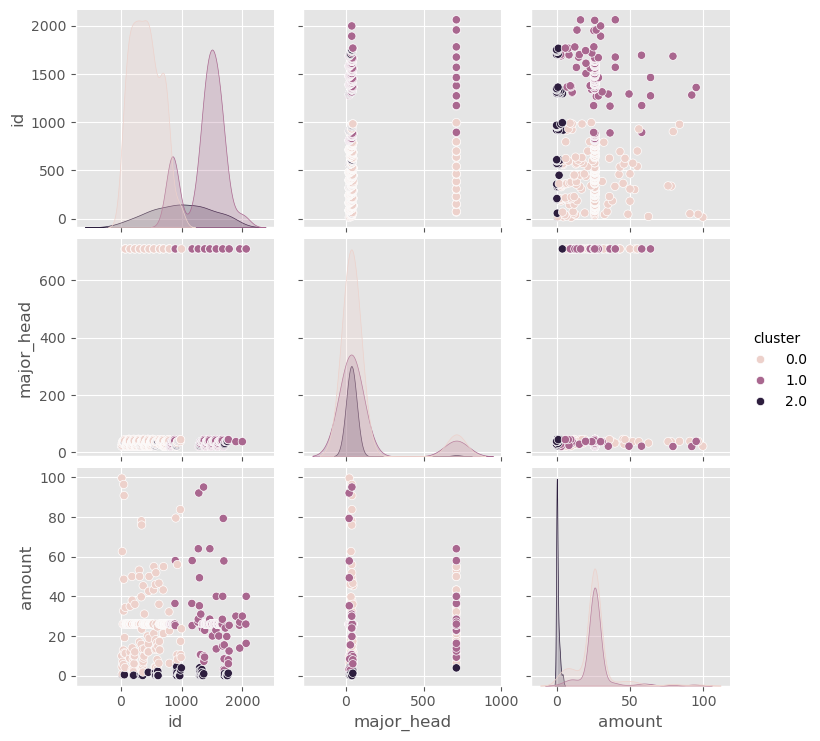

In [138]:
# ======================
# 6. ADVANCED ANALYTICS
# ======================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

print("\n=== Clustering Analysis ===")

# 1. Handle infinite/large values and missing data
cluster_data = df[numeric_cols].replace([np.inf, -np.inf], np.nan).dropna()

# 2. Check if we have enough data left
if len(cluster_data) == 0:
    raise ValueError("No valid data remaining after removing inf/nan values")
    
# 3. Scale the data
scaler = StandardScaler()
try:
    scaled_data = scaler.fit_transform(cluster_data)
except ValueError as e:
    print("Scaling failed with error:", e)
    print("Data statistics:\n", cluster_data.describe())
    raise

# 4. Elbow method to find optimal clusters
wcss = []
max_clusters = min(7, len(cluster_data))  # Ensure we don't ask for more clusters than data points
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 5. Apply K-means clustering (using 3 clusters or fewer if limited data)
n_clusters = min(3, len(cluster_data) - 1)  # Need at least n+1 points for n clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels back to original dataframe (will have NaN for dropped rows)
df['cluster'] = np.nan
df.loc[cluster_data.index, 'cluster'] = cluster_labels

# 6. Visualize clusters (only if we have at least 2 clusters)
if n_clusters > 1:
    plot_vars = numeric_cols[:min(3, len(numeric_cols))]  # Use up to 3 variables for visualization
    sns.pairplot(df.dropna(subset=['cluster']), vars=plot_vars, hue='cluster')
    plt.show()
else:
    print("Not enough clusters for visualization (n_clusters = 1)")


=== Time Series Analysis ===


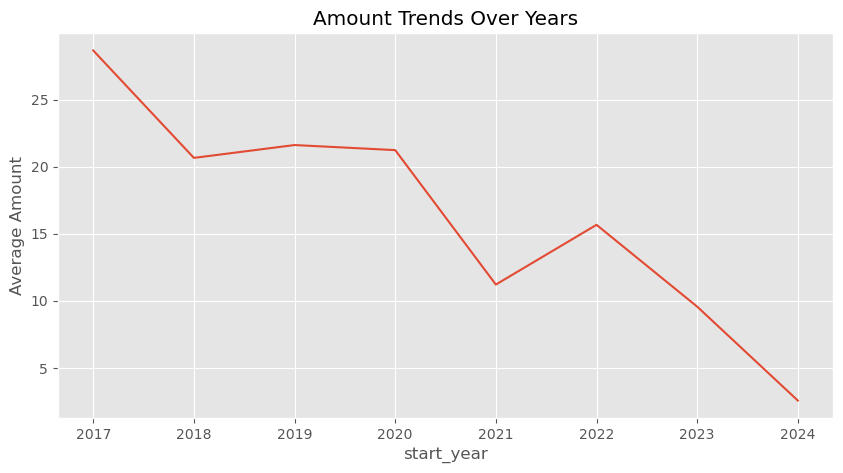

In [140]:
# 6.2 Time Series Analysis (if applicable)
if 'start_year' in df.columns:
    print("\n=== Time Series Analysis ===")
    time_series = df.groupby('start_year')['amount'].mean()
    time_series.plot(kind='line', figsize=(10,5))
    plt.title('Amount Trends Over Years')
    plt.ylabel('Average Amount')
    plt.show()

In [141]:
df_clean = df[['estimate_type', 'amount']].dropna()

In [142]:
group1 = df_clean[df_clean['estimate_type'] == 'Actual']['amount'] 
group2 = df_clean[df_clean['estimate_type'] == 'Budget']['amount']

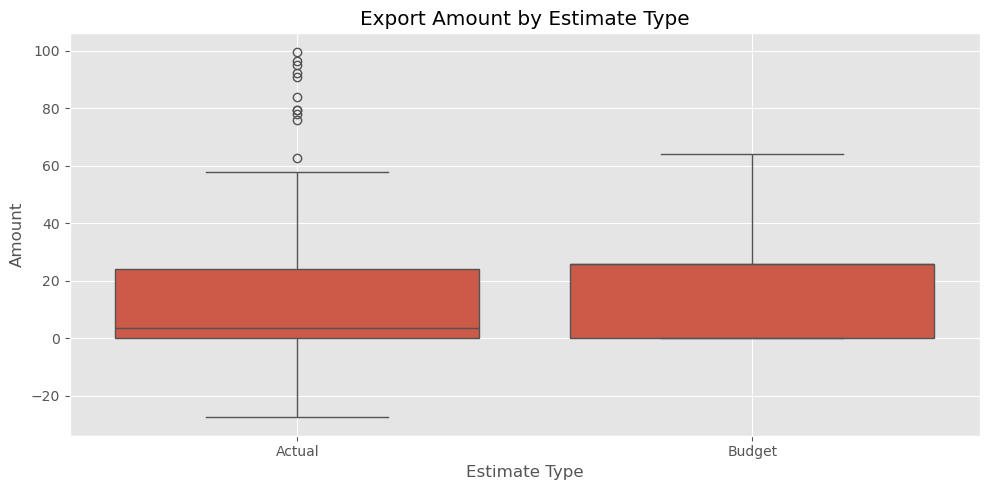

In [143]:
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='estimate_type', y='amount', data=df_clean[df_clean['estimate_type'].isin(['Actual', 'Budget'])]) 
plt.title("Export Amount by Estimate Type") 
plt.xlabel("Estimate Type") 
plt.ylabel("Amount") 
plt.grid(True) 
plt.tight_layout() 
plt.show()

In [144]:
t_stat, p_val = ttest_ind(group1, group2, equal_var=False, nan_policy='omit')

NameError: name 'ttest_ind' is not defined

In [ ]:
print(f"T-statistic: {t_stat:.4f}") 
print(f"P-value: {p_val:.4f}")

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Drop rows with missing amount values
reg_df = df[['major_head', 'amount']].dropna()

# Reshape inputs for scikit-learn
X = reg_df['major_head'].values.reshape(-1, 1)
y = reg_df['amount'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Display coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

In [ ]:
df = df.dropna(subset=['amount'])

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Extract year from 'date' column if exists
if 'date' in df.columns:
    df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year
    df['start_year'] = df['year']
    df['end_year'] = df['year']
else:
    # If date column does not exist, we simulate dummy year features
    df['start_year'] = 2018
    df['end_year'] = 2020

# Encode categories
le_major = LabelEncoder()
le_minor = LabelEncoder()
df['major_category_encoded'] = le_major.fit_transform(df['major_category'])
df['minor_category_encoded'] = le_minor.fit_transform(df['minor_category'])

# Features and target
X = df[['major_category_encoded', 'minor_category_encoded', 'start_year', 'end_year']]
y = df['amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Export Value (INR)')
plt.ylabel('Predicted Export Value (INR)')
plt.title('Linear Regression: Actual vs Predicted Amount')
plt.grid(True)
plt.tight_layout()
plt.show()